In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
import collections
import re
import statistics

# Data Preprocessing

#Data Cleaning


In [3]:
source_file = open("Group_2.csv", "r") #original file
df_to_append = []
remove_from_lines = ['"','+','0000']
count = 0
for line in source_file:
    line = line.replace(",", " ")

    for word in remove_from_lines:
        line = line.replace(word,'')

    tweet_date = line[line.find("{created_at") + 12 : line.find("id:")] 
    index = line.index(tweet_date)
    line = line [index : :]

    tweet_id_no = line[line.find("id:") + 3 : line.find("id_str:")]
    index = line.index(tweet_id_no)
    line = line [index : :]

    tweet_id = line[line.find("id_str:")+7:line.find("text:")]
    index = line.index(tweet_id)
    line = line [index : :]
    
    tweet_text = line[line.find("text:")+5:line.find("source:")]
    index = line.index(tweet_text)
    line = line[index : :]

    tweet_source = line[line.find("source:") + 7 : line.find("truncated:")]
    index = line.index(tweet_source)
    line = line[index : :]

    truncated = line[line.find("truncated:") + 10 : line.find("in_reply_to_status_id:")]
    index = line.index(truncated)
    line = line[index : :]

    in_reply_to_status_id = line[line.find("in_reply_to_status_id:") + 22 : line.find("in_reply_to_status_id_str:")]
    index = line.index(in_reply_to_status_id)
    line = line[index : :]
    
    in_reply_to_status_id_str = line[line.find("in_reply_to_status_id_str:") + 26 : line.find("in_reply_to_user_id:")]
    index = line.index(in_reply_to_status_id_str)
    line = line[index : :]

    in_reply_to_user_id = line[line.find("in_reply_to_user_id:") + 20 : line.find("in_reply_to_user_id_str:")]
    index = line.index(in_reply_to_user_id)
    line = line[index : :]

    in_reply_to_screen_name = line[line.find("in_reply_to_screen_name:") + 24 : line.find("user:")]
    index = line.index(in_reply_to_screen_name)
    line = line[index : :]

    useridIndex = line.index(line[line.find("user:{id:")::])
    additional = useridIndex-index
    line = line[index+additional : :]
    
    user_id_str = line[line.find("id_str") + 7 : line.find("name:")]
    index = line.index(user_id_str)
    line = line [index : :]

    user_name = line[line.find("name:") + 5 : line.find("screen_name:")]
    index = line.index(user_name)
    line = line [index : :]

    user_screen_name = line[line.find("screen_name:") + 12 : line.find("location:")]
    index = line.index(user_screen_name)
    line = line [index : :]

    location = line[line.find("location:")+9:line.find("url:")]
    index = line.index(location)
    line = line[index : :]

    url = line[line.find("url:") + 4 : line.find("description:")]
    index = line.index(url)
    line = line[index : :]

    description = line[line.find("description:")+12:line.find("translator_type:")]
    index = line.index(description)
    line = line[index : :]

    translator_type = line[line.find("translator_type:") +16 : line.find("protected:")]
    index = line.index(translator_type)
    line = line[index : :]

    protected_status = line[line.find("protected:") +16 : line.find("verified:")]
    index = line.index(protected_status)
    line = line[index : :]

    verified = line[line.find("verified:")+9:line.find("followers_count:")]
    index = line.index(verified)
    line = line[index : :]

    followers_count = line[line.find("followers_count:")+16:line.find("friends_count:")]
    index = line.index(followers_count)
    line = line[index : :]

    friends_count = line[line.find("friends_count:")+14:line.find("listed_count:")]
    index = line.index(friends_count)
    line = line[index : :]

    listed_count = line[line.find("listed_count:")+13:line.find("favourites_count:")]
    index = line.index(listed_count)
    line = line[index : :]

    cumulative_favorites = line[line.find("favourites_count:")+17:line.find("statuses_count:")]
    index = line.index(cumulative_favorites)
    line = line[index : :]
    
    statuses_count = line[line.find("statuses_count:")+15:line.find("created_at:")]
    index = line.index(statuses_count)
    line = line[index : :]

    account_creation_date = line[line.find("created_at:")+11:line.find("utc_offset:")]
    index = line.index(account_creation_date)
    line = line[index : :]

    utc_offset = line[line.find("utc_offset:") + 11 : line.find("time_zone:")]
    index = line.index(account_creation_date)
    line = line[index : :]

    time_zone = line[line.find("time_zone:") + 10 : line.find("geo_enabled:")]
    index = line.index(time_zone)
    line = line[index : :]

    geo_enabled = line[line.find("geo_enabled:") + 12 :line.find("lang:")]
    index = line.index(geo_enabled)
    line = line[index : :]

    language = line[line.find("lang:") + 5 : line.find("contributors_enabled")]
    index = line.index(language)
    line = line[index : :]

    contributors_enabled = line[line.find("contributors_enabled:") + 21 : line.find("is_translator:")]
    index = line.index(contributors_enabled)
    line = line[index : :]

    is_translator = line[line.find("is_translator:") + 14 : line.find("profile_background_color:")]
    index = line.index(is_translator)
    line = line[index : :]

    following = line[line.find("following:") + 10 : line.find("follow_request_sent:")]
    index = line.index(following)
    line = line [index : :]

    follow_request_sent = line[line.find("follow_request_sent:") + 20 : line.find("notifications")]
    index = line.index(follow_request_sent)
    line = line [index : :]

    notifications = line[line.find("notifications:") + 14 : line.find("}")]
    index = line.index(notifications)
    line = line [index : :]

    coordinates = line[line.find("coordinates:") + 12 : line.find("place")]
    index = line.index(coordinates)
    line = line [index : :]

    place = line[line.find("place:") + 6 : line.find("contributors")]
    index = line.index(place)
    line = line [index : :]

    
    extended_tweet = line[line.find("text:") + 5 : line.find("display_text_range:")]
    index = line.index(extended_tweet)
    line = line [index : :]

    entities = line[line.find("text:")+5:line.find("indices:")]
    index = line.index(entities)
    line = line [index : :]

    reply_count = line[line.find("reply_count:") + 12 : line.find("retweet_count:")]
    index = line.index(reply_count)
    line = line [index : :]

    if len(reply_count) > 6:
        reply_count = np.NAN

    retweet_count = line[line.find("retweet_count:")+14:line.find("favorite_count")]
    index = line.index(retweet_count)
    line = line[index : :]

    favorite_count= line[line.find("favorite_count:")+15:line.find("entities:")]
    index = line.index(favorite_count)
    line = line[index : :]

    df_to_append.append([tweet_date,tweet_id_no, tweet_id,tweet_text,tweet_source,truncated,in_reply_to_status_id,
                in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_screen_name,user_id_str,user_name,user_screen_name,location,url,description,
                translator_type, protected_status,verified,followers_count,friends_count,listed_count,cumulative_favorites,
                account_creation_date,statuses_count,utc_offset, time_zone, geo_enabled,language, contributors_enabled, is_translator,
                following, follow_request_sent, notifications, coordinates, place,extended_tweet, entities, reply_count,
                retweet_count,favorite_count])
source_file.close()

df = pd.DataFrame(df_to_append, columns= ['Tweet_date','Tweet_id_No', 'Tweet_id_str','Tweet_text','Tweet_Source',
    'Truncated_Status','Reply_to_Status_ID','Reply_to_status_ID_Str','Reply_to_USER_id','Reply_to_screen_name','User_id',
    'Name of User', 'Screen Name of user','Location','URL','Description','translator_type', 'protected_status','Verified',
    'Followers_count','Friends_count','Listed_count','Cumulative_favorites', 'Account_creation_date','Statuses_count',
    'utc_offset','time_zone','geo_enabled_status','Language','contributors_enabled', 'is_translator',
    'following', 'follow_request_sent','notifications','coordinates','place', 'Extended_tweet', 'Entities', 'Reply_count', 'Retweet_count','Favorites_count'])

# print(df.iloc[1:2000 , 38:39 ])

df.to_csv('Cleaned_Data.csv', index = False, sep =',')

#Formatting the Output

cleaned_data = open("Cleaned_Data.csv","r")

cleaned_formatted=open("Final Formatted File.csv","w")

for line in cleaned_data:
    if line[0] == ",":
        continue
    cleaned_formatted.write(line)

cleaned_data.close()
cleaned_formatted.close()

os.remove("Cleaned_Data.csv")

In [4]:
df = pd.read_csv('Final Formatted File.csv')

In [5]:
df

Tweet_date  \
0                              Fri Oct 11 07:03:12  2019    
1                                                     ...   
2                                                     ...   
3                              Fri Oct 11 07:03:13  2019    
4                                                     ...   
...                                                   ...   
185940                         Fri Oct 11 09:26:50  2019    
185941                                                ...   
185942                                                ...   
185943                         Fri Oct 11 09:26:50  2019    
185944                                                ...   

                                              Tweet_id_No  \
0                                    1182552212876214272    
1                                                     ...   
2                                                     ...   
3                                    1182552213790609413    
4                                                     ...   
...                                                   ...   
185940                               1182588355869057024    
185941                                                ...   
185942                                                ...   
185943                               1182588357253259264    
185944                                                ...   

                                             Tweet_id_str  \
0                                    1182552212876214272    
1                                                     ...   
2                                                     ...   
3                                    1182552213790609413    
4                                                     ...   
...                                                   ...   
185940                               1182588355869057024    
185941                                                ...   
185942                                                ...   
185943                               1182588357253259264    
185944                                                ...   

                                               Tweet_text  \
0       @bbcquestiontime @TheoPaphitis Lady: I knew ex...   
1                                                     ...   
2                                                     ...   
3       RT UKGovScotland: RT tradegovuk: Here\u2019s y...   
4                                                     ...   
...                                                   ...   
185940  RT @LeaveEUOfficial: Oasis legend Noel Gallagh...   
185941                                                ...   
185942                                                ...   
185943  RT @DavidLammy: Outrageous that @Nigel_Farage'...   
185944                                                ...   

                                             Tweet_Source  \
0       \u003ca href=\http:\/\/twitter.com\/download\/...   
1                                                     ...   
2                                                     ...   
3       \u003ca href=\https:\/\/ifttt.com\ rel=\nofoll...   
4                                                     ...   
...                                                   ...   
185940  \u003ca href=\http:\/\/twitter.com\/download\/...   
185941                                                ...   
185942                                                ...   
185943  \u003ca href=\http:\/\/twitter.com\/download\/...   
185944                                                ...   

                                         Truncated_Status  \
0                                                   true    
1                                                     ...   
2                                                     ...   
3                                                   true    
4                                                     ...   
...             

In [6]:
#pip install missingno

This bar chart attached below tells how many missing values are there in each column of our dataset. More white space represetns more nan values. The given results helped us dropping columns with high significantly high number of null values at a later stage of the analysis.


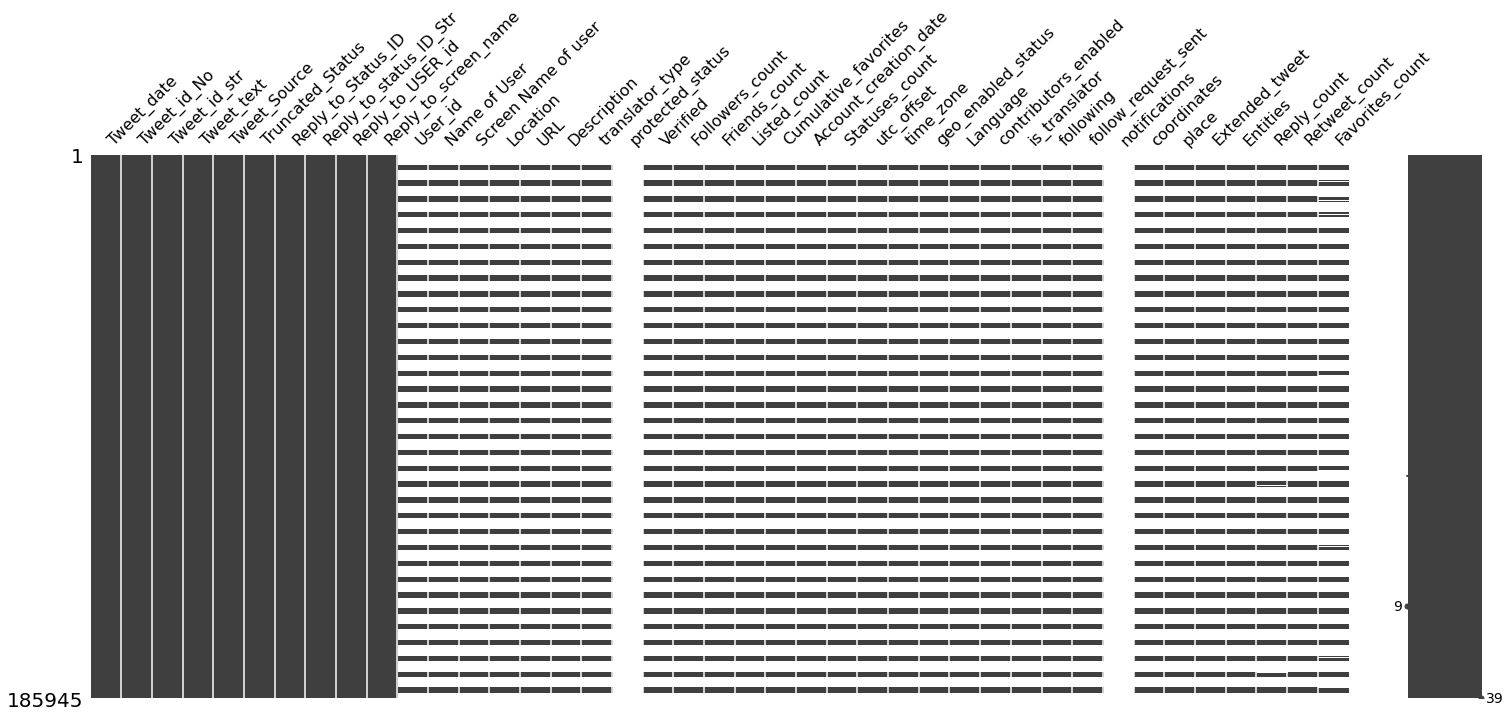

In [7]:
import missingno as msno
  
# Visualize missing values as a matrix
msno.matrix(df)
print('This bar chart attached below tells how many missing values are there in each column of our dataset. More white space represetns more nan values. The given results helped us dropping columns with high significantly high number of null values at a later stage of the analysis.')

In [8]:
def remove_usernames(text):
    return re.sub('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)', '', text)

In [9]:
def remove_hyperlinks(text):
    return re.sub("((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*", '', text)

In [10]:
def remove_punctuation(text):
    return re.sub("[^a-zA-Z]+", " ", str(text))

In [11]:
def to_lower_case(text):
    return text.lower()

In [12]:
from nltk.stem import PorterStemmer
porter_stemmer=PorterStemmer()
def stemming(text):
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

# About The DataSet

In [13]:
#some null values were stored as a string. Converted them back to NaN using np.nan
count=0
columns = df.columns.to_list()
for x in range(len(columns)):
    lista = df[columns[x]].to_list()
    size = len(lista)
    listb=[]
    for i in range(size):
        if (lista[i]=="null ") or (lista[i]=="null") or (lista[i]==" null") or lista[i]=="nan" or lista[i]==" nan" or lista[i]=="nan ":
            lista[i]=np.nan
    df[columns[x]]=lista
df.isnull().sum()

Tweet_date                     2
Tweet_id_No                    0
Tweet_id_str                   0
Tweet_text                     0
Tweet_Source                   0
Truncated_Status               0
Reply_to_Status_ID         57208
Reply_to_status_ID_Str     57208
Reply_to_USER_id           56749
Reply_to_screen_name       56750
User_id                   123963
Name of User              123963
Screen Name of user       123963
Location                  143194
URL                       172365
Description               135703
translator_type           123963
protected_status          185945
Verified                  123963
Followers_count           123963
Friends_count             123963
Listed_count              123963
Cumulative_favorites      123963
Account_creation_date     123963
Statuses_count            123963
utc_offset                185945
time_zone                 185945
geo_enabled_status        123963
Language                  185945
contributors_enabled      123963
is_transla

In [14]:
#Exploration of columns in the dataset 
df.columns

Index(['Tweet_date', 'Tweet_id_No', 'Tweet_id_str', 'Tweet_text',
       'Tweet_Source', 'Truncated_Status', 'Reply_to_Status_ID',
       'Reply_to_status_ID_Str', 'Reply_to_USER_id', 'Reply_to_screen_name',
       'User_id', 'Name of User', 'Screen Name of user', 'Location', 'URL',
       'Description', 'translator_type', 'protected_status', 'Verified',
       'Followers_count', 'Friends_count', 'Listed_count',
       'Cumulative_favorites', 'Account_creation_date', 'Statuses_count',
       'utc_offset', 'time_zone', 'geo_enabled_status', 'Language',
       'contributors_enabled', 'is_translator', 'following',
       'follow_request_sent', 'notifications', 'coordinates', 'place',
       'Extended_tweet', 'Entities', 'Reply_count', 'Retweet_count',
       'Favorites_count'],
      dtype='object')

In [15]:
#Dropping columns due to high presence of null_values
#removing Tweet_id_str column due to repitition of same data / reducing data redundancy
df = df.drop(columns=['Reply_to_Status_ID', 'Reply_to_status_ID_Str','Reply_to_USER_id','Reply_to_screen_name','protected_status','utc_offset','time_zone','Language','following','follow_request_sent','notifications','coordinates','place','Tweet_id_str'])
df

Tweet_date  \
0                              Fri Oct 11 07:03:12  2019    
1                                                     ...   
2                                                     ...   
3                              Fri Oct 11 07:03:13  2019    
4                                                     ...   
...                                                   ...   
185940                         Fri Oct 11 09:26:50  2019    
185941                                                ...   
185942                                                ...   
185943                         Fri Oct 11 09:26:50  2019    
185944                                                ...   

                                              Tweet_id_No  \
0                                    1182552212876214272    
1                                                     ...   
2                                                     ...   
3                                    1182552213790609413    
4                                                     ...   
...                                                   ...   
185940                               1182588355869057024    
185941                                                ...   
185942                                                ...   
185943                               1182588357253259264    
185944                                                ...   

                                               Tweet_text  \
0       @bbcquestiontime @TheoPaphitis Lady: I knew ex...   
1                                                     ...   
2                                                     ...   
3       RT UKGovScotland: RT tradegovuk: Here\u2019s y...   
4                                                     ...   
...                                                   ...   
185940  RT @LeaveEUOfficial: Oasis legend Noel Gallagh...   
185941                                                ...   
185942                                                ...   
185943  RT @DavidLammy: Outrageous that @Nigel_Farage'...   
185944                                                ...   

                                             Tweet_Source  \
0       \u003ca href=\http:\/\/twitter.com\/download\/...   
1                                                     ...   
2                                                     ...   
3       \u003ca href=\https:\/\/ifttt.com\ rel=\nofoll...   
4                                                     ...   
...                                                   ...   
185940  \u003ca href=\http:\/\/twitter.com\/download\/...   
185941                                                ...   
185942                                                ...   
185943  \u003ca href=\http:\/\/twitter.com\/download\/...   
185944                                                ...   

                                         Truncated_Status       User_id  \
0                                                   true   3.850469e+08   
1                                                     ...           NaN   
2                                                     ...           NaN   
3                                                   true   1.138960e+18   
4                                                     ...           NaN   
...                                                   ...           ...   
185940                                             false   9.088059e+17   
185941                                                ...           NaN   
185942                                                ...           NaN   
185943                                             false   4.739484e+08   
185944                                                ...           NaN   

                Name of User Screen Name of user         Location  \
0                    Tobias         meinanderes               NaN   
1                        NaN                 NaN              NaN   
2      

In [16]:
df.drop_duplicates(subset ="Tweet_id_No",keep = False, inplace = True)
df.shape

(61934, 27)

<AxesSubplot:>

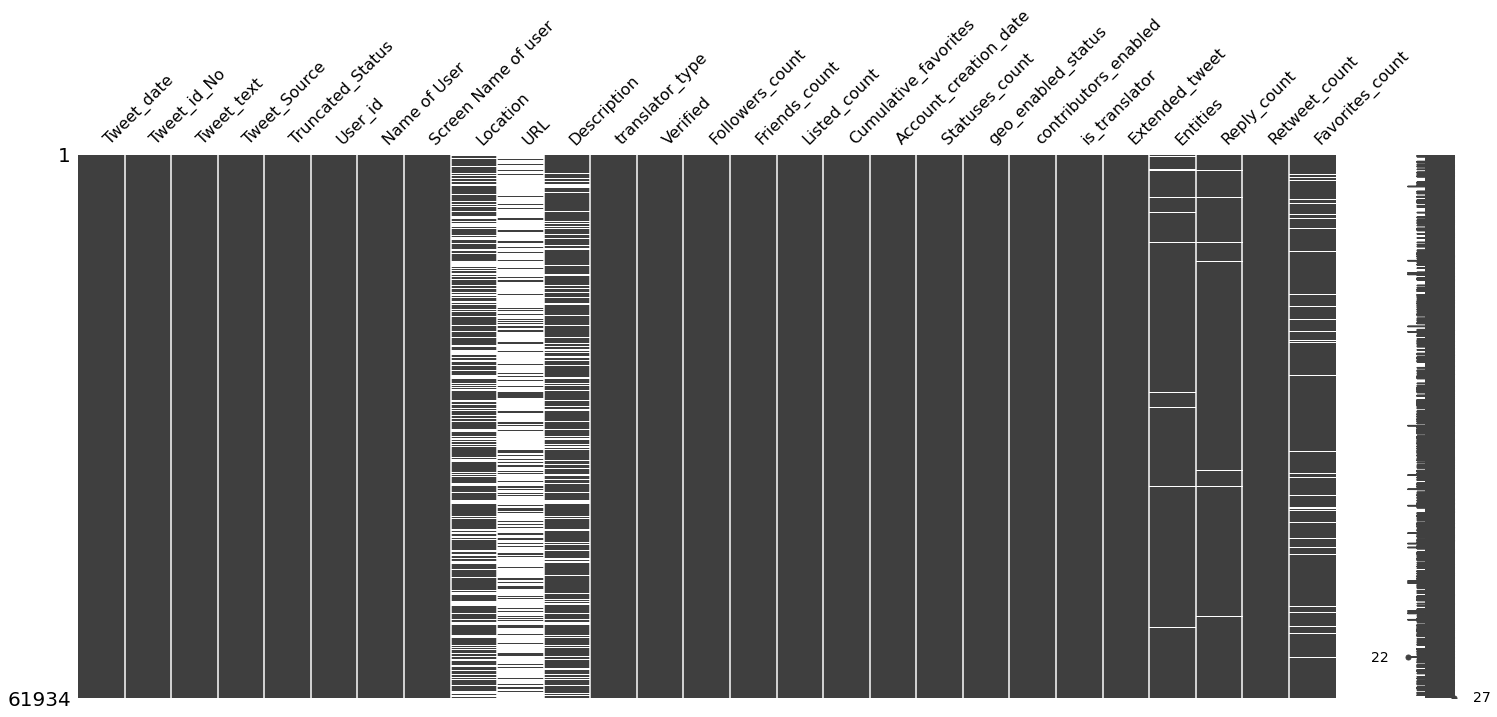

In [17]:
msno.matrix(df)

# EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS

In [18]:
total_tweets = df['Tweet_id_No'].unique()
total_tweets1=len(total_tweets)
print("Total Number of tweets = ",total_tweets1)
urltweets = df['URL']
print("Tweets with URL = ", total_tweets1-urltweets.isnull().sum())
ver_tweets = df[df["Verified"]=='true '].shape[0]
nonver_tweets = total_tweets1-ver_tweets
print("Verified Tweets: ",ver_tweets, " Non-Verified Tweets: ",nonver_tweets)
tweets_greater_500_followers = df[df['Followers_count']>=500].shape[0]
tweets_less_500_followers = total_tweets1-tweets_greater_500_followers
print("Tweets made by accounts who had greater than or equal to 500 followers: ",tweets_greater_500_followers)
print("Tweets made by accounts who had less than 500 followers: ", tweets_less_500_followers)

bcount=0
subject_list = df["Entities"].to_list()
for j in range(len(subject_list)):
    res1 = str(subject_list[j]).find('Brexit')
    res2 =  str(subject_list[j]).find('brexit')
    if (res1 != -1) or (res2 !=-1):
        bcount=bcount+1
#print("Number of tweets which contain brexit in their text: ",bcount)
#Brexit data proven

#cleaning reply count column
#replies = df['Reply_count'].to_list()
#replies1=[]
#for l in range(len(replies)):
#    res3=str(replies[l])
#    if len(res3)<10:
#        replies1.append(int(res3))
#    else:
#        replies1.append(np.nan)
#df['Reply_count']=replies1
number_of_replies_greater_1000 = df[df['Reply_count']>1000].shape[0]
print("Tweets with more than 1000 replies: ",number_of_replies_greater_1000)

Total Number of tweets =  61934
Tweets with URL =  13576
Verified Tweets:  1142  Non-Verified Tweets:  60792
Tweets made by accounts who had greater than or equal to 500 followers:  33500
Tweets made by accounts who had less than 500 followers:  28434
Tweets with more than 1000 replies:  3332


In [19]:
#cleaning
relist = df["Retweet_count"].to_list()
relist1 = []
for x in range(len(relist)):
    if len(relist[x])<10:
       relist1.append(int(relist[x]))
    else:
        relist1.append(np.nan)
df["Retweet_count"]=relist1

In [20]:
print('Total Tweets: ', total_tweets1)
unique_accounts = len(df.User_id.unique())
retweets_sum = df["Retweet_count"].sum()
print("Total number of Retweets: ",int(retweets_sum))
print('Total Unique Users: ', unique_accounts)
unique_tweet_timings = df.Tweet_date.unique()
print("Number of tweets containing a URL: ",total_tweets1-urltweets.isnull().sum()) # calculate above
#Number of tweets that are replies
t_count=0
t_c=0
tstring = df['Tweet_text'].to_list()
for j in range(len(tstring)):
    stringg=str(tstring[j])
    if (stringg[0:2].find("RT"))!=-1:
        t_count=t_count+1

for p in range(len(tstring)):
    string1=str(tstring[p])
    if (string1[0:2].find("RT"))==-1:
        if (string1[0].find("@"))!=-1:
            t_c=t_c+1
print("Number of Tweets that are replies: ",t_count+t_c)

print('The extracted dataset from twitter comprises of tweets from', unique_tweet_timings[0], 'till', unique_tweet_timings.item(-1))

Total Tweets:  61934
Total number of Retweets:  30996674
Total Unique Users:  30537
Number of tweets containing a URL:  13576
Number of Tweets that are replies:  52288
The extracted dataset from twitter comprises of tweets from Fri Oct 11 07:03:12  2019  till Fri Oct 11 09:26:50  2019 


# Tweets from verified and unverified accounts

In [21]:
subset1 = df[['Name of User','Followers_count','Verified']]
ver = subset1[subset1['Verified']=='true '].sort_values(by='Followers_count', ascending=False)
#ver.drop_duplicates(subset ="Name of User",keep = False, inplace = True)
abc = ver.groupby('Name of User')['Followers_count'].mean()
abc = pd.DataFrame(abc)
abc = abc.sort_values(by='Followers_count', ascending=False)
abc.head(10)

Followers_count
Name of User                        
Reuters Top News        2.077957e+07
The Guardian            8.039751e+06
Bloomberg               5.627978e+06
The Hindu               5.546778e+06
Sky News                5.185423e+06
Financial Times         5.034418e+06
Expansi\u00f3n CNN      3.996868e+06
Noticias24              3.259278e+06
Thairath_News           3.048868e+06
Brian Cox               2.940980e+06

In [22]:
temp = df.copy()
indexx = [i for i in range (0,len(temp))]
temp.index = indexx

# Analyzing at which hour tweets were at peak

In [23]:
#Analyzing at which hour tweets were at peak
tweets_7_730 = 0
tweets_730_8 = 0
tweets_8_830 = 0
tweets_830_9 = 0
tweets_9_930 = 0

for i in range (0, len(temp['Tweet_date'])-4):
    hour = int((temp['Tweet_date'][i])[11:13])
    minutes = int((temp['Tweet_date'][i])[14:16])
    if hour < 8:
        if minutes < 30:
            tweets_7_730 = tweets_7_730 +1
        else:
            tweets_730_8 = tweets_730_8 +1
    elif hour < 9:
        if minutes < 30:
            tweets_8_830 = tweets_8_830 +1
        else:
            tweets_830_9 = tweets_830_9 +1
    elif hour < 10:
        tweets_9_930 = tweets_9_930 +1 
print('Total tweets between 7 and 7:30:    ', tweets_7_730)
print('Total tweets between 7:30 and 8:    ', tweets_730_8)
print('Total tweets between 8 and 8:30:    ', tweets_8_830)
print('Total tweets between 8:30 and 9:    ', tweets_830_9)
print('Total tweets between 9 and 9:30:    ', tweets_9_930)

Total tweets between 7 and 7:30:     11139
Total tweets between 7:30 and 8:     13557
Total tweets between 8 and 8:30:     12911
Total tweets between 8:30 and 9:     12550
Total tweets between 9 and 9:30:     11773


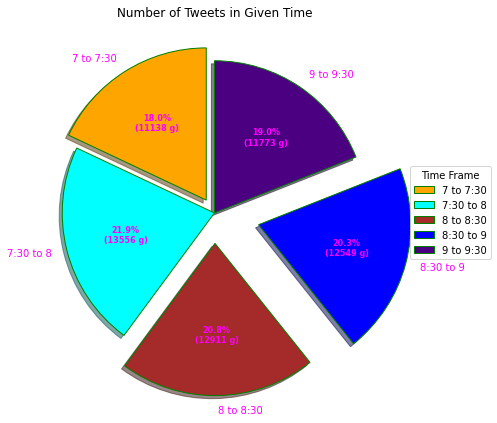

In [24]:
# Creating dataset
time_frame = ["7 to 7:30", "7:30 to 8", "8 to 8:30", "8:30 to 9", "9 to 9:30"]
  
no_tweets = [tweets_7_730, tweets_730_8, tweets_8_830, tweets_830_9, tweets_9_930]
  
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
  
colors = ( "orange", "cyan", "brown",
          "blue", "indigo", "beige")
  
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(no_tweets, 
                                  autopct = lambda pct: func(pct, no_tweets),
                                  explode = explode, 
                                  labels = time_frame,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
  
# Adding legend
ax.legend(wedges, time_frame,
          title ="Time Frame",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Number of Tweets in Given Time")
  
# show plot
plt.show()

In [25]:
# Replacing nans with Not Disclosed
values = {'Location': 'Not Disclosed'}
temp = temp.fillna(value=values)
temp['Location']
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61934 entries, 0 to 61933
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tweet_date             61934 non-null  object 
 1   Tweet_id_No            61934 non-null  object 
 2   Tweet_text             61934 non-null  object 
 3   Tweet_Source           61934 non-null  object 
 4   Truncated_Status       61934 non-null  object 
 5   User_id                61934 non-null  float64
 6   Name of User           61934 non-null  object 
 7   Screen Name of user    61934 non-null  object 
 8   Location               61934 non-null  object 
 9   URL                    13576 non-null  object 
 10  Description            50212 non-null  object 
 11  translator_type        61934 non-null  object 
 12  Verified               61934 non-null  object 
 13  Followers_count        61934 non-null  float64
 14  Friends_count          61934 non-null  float64
 15  Li

In [26]:
#Cleaning and Standardizing Location of the people with Tweets
temp['Location'] = temp['Location'].apply(remove_punctuation)


for i in range(0, len(temp.Location)):
    if(temp.iloc[i][8] == 'London England '):
        temp.at[i,'Location'] = 'London '
    elif(temp.iloc[i][8] == 'England United Kingdom '):
        temp.at[i,'Location'] = 'England '
    elif(temp.iloc[i][8] == 'UK '):
        temp.at[i,'Location'] = 'United Kingdom '
    elif(temp.iloc[i][8] == 'Scotland United Kingdom '):
        temp.at[i,'Location'] = 'Scotland '
    elif(temp.iloc[i][8] == 'Manchester England '):
        temp.at[i,'Location'] = 'Manchester '
    elif(temp.iloc[i][8] == 'London UK '):
        temp.at[i,'Location'] = 'London '
    elif(temp.iloc[i][8] == 'Edinburgh Scotland '):
        temp.at[i,'Location'] = 'Edinburgh '
    elif(temp.iloc[i][8] == "European Union ud c uddea ud c uddfa "):
        temp.at[i,'Location'] = 'European Union '
    elif(temp.iloc[i][8] == "France u u e u u u u f "):
        temp.at[i,'Location'] = 'France '
    elif(temp.iloc[i][8] == "London UK  Europe "):
        temp.at[i,'Location'] = 'London '
    elif(temp.iloc[i][8] == "EU "):
        temp.at[i,'Location'] = 'European Union '
    elif(temp.iloc[i][8] == "Germany ud c udde ud c uddea "):
        temp.at[i,'Location'] = 'Germany '
    elif(temp.iloc[i][8] == "Scotland ud c udff udb udc udb udc udb udc udb udc udb udc udb udc f "):
        temp.at[i,'Location'] = 'Scotland '
    elif(temp.iloc[i][8] == "Glasgow Scotland"):
        temp.at[i,'Location'] = 'Glasgow'


In [27]:
#Number of Tweets based on each Location
tweet_location = temp['Location'].value_counts()
tweet_location = tweet_location[tweet_location >= 100]
tweet_location

Not Disclosed             19221
London                     3791
United Kingdom             3074
England                    1806
Scotland                    727
European Union              460
South East England          405
South West England          383
Europe                      372
Manchester                  349
Edinburgh                   310
North West England          266
Wales United Kingdom        223
Glasgow Scotland            203
Ireland                     195
Glasgow                     151
Earth                       138
Liverpool England           138
France                      122
West Midlands England       119
Wales                       118
North East England          118
Bristol England             107
Name: Location, dtype: int64

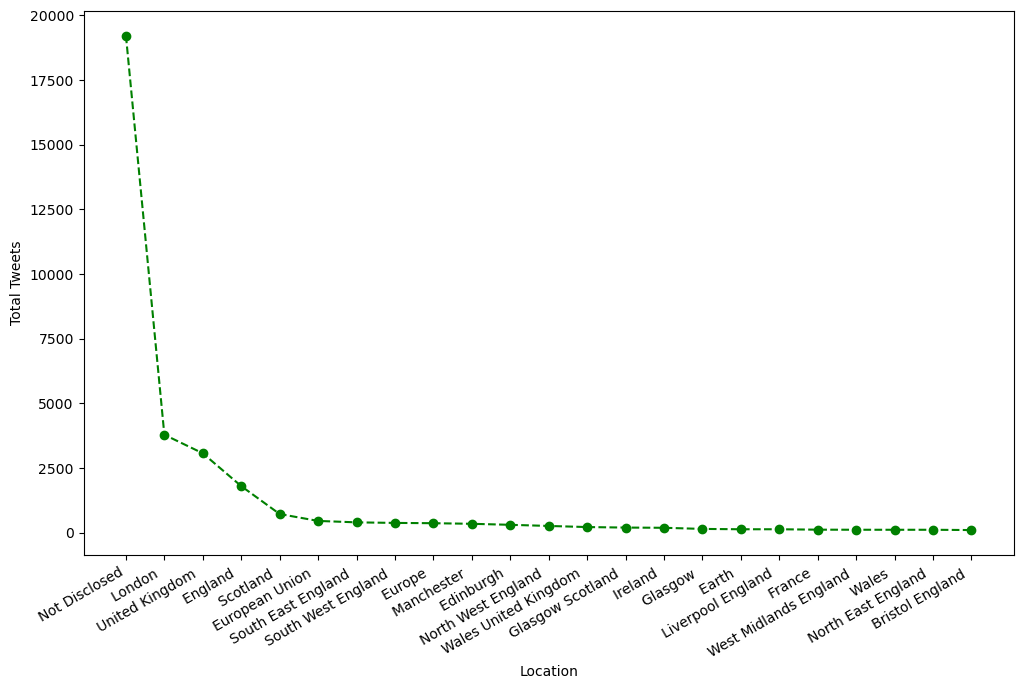

In [28]:
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(tweet_location, marker = "o", linestyle = "--", color = "g")
fig.autofmt_xdate()
plt.xlabel("Location")
plt.ylabel("Total Tweets")
plt.show()
# bar chart more suitable since locations repeated?

# Finding most commonly used words and Hashtags in the tweets

In [290]:
#Finding most commonly used words and Hashtags in the tweets
words_in_tweet = [tweet.lower().split() for tweet in temp['Tweet_text']]
all_words = list(itertools.chain(*words_in_tweet))

#Removing most commonly used words in English such as To, I, we, etc so that they don't affect the analysis. We have added a separate dictionary that includes these most common words.
stop_path = 'stop_words_extended.txt'
stop = open(stop_path, "r")
stop_words = []
for word in stop.read().split():
        stop_words.append(word)
stop.close()
all_words = [word for word in all_words if word not in stop_words]

In [291]:
for i in range (0, len(all_words)):
    if (all_words[i] == '#brexit' or all_words[i] == 'brexit.'):
        all_words[i] = 'brexit'
    elif (all_words[i] == 'voted'):
        all_words[i] = 'vote'
    elif (all_words[i] == 'u.k.'):
        all_words[i] = 'uk'

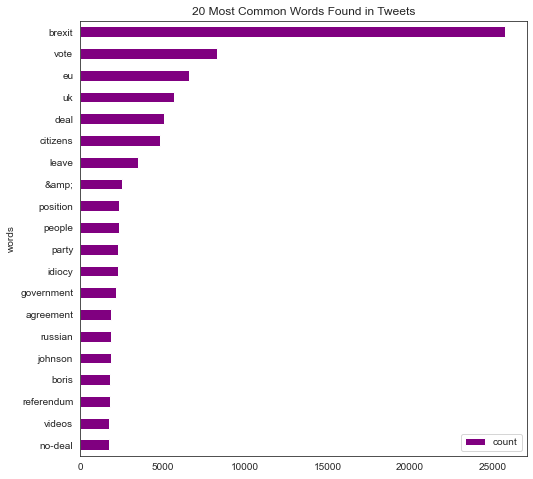

In [292]:
count_words = collections.Counter(all_words)
clean_tweets = pd.DataFrame(count_words.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("20 Most Common Words Found in Tweets")

plt.show()

# Word Cloud of Most Frequently Used Words

In [293]:
#Top 15 Tweets with highest number of replies
temp2 = temp.copy()
pd.to_numeric(temp2['Reply_count'])
temp2.sort_values(by='Reply_count', ascending = False, inplace=True)

replies = []
user_name = []
for i in temp2['Reply_count'].head(15):
    replies.append(i)

for i in temp2['Name of User'].head(15):
    name = (remove_punctuation(i))
    if (name == 'Manchmal dumm ud d udd u b ufe f ud e udd c '):
        name = 'Manchmal'
    elif (name == 'Manuela Sch u e big Ostseebarbie '):
        name = 'Manuela'
    elif (name == 'Helen Mole ud c udf GTTO '):
        name = 'Helen Mole'
    
    user_name.append(name)

In [294]:
all_words2 = all_words
#for i in range (0, len(all_words2)):
    #all_words2[i] = remove_usernames(all_words2[i])
    #all_words2[i] = remove_hyperlinks(all_words2[i])
    #all_words2[i] = remove_punctuation(all_words2[i])
    #all_words2[i] = stemming(all_words2[i])

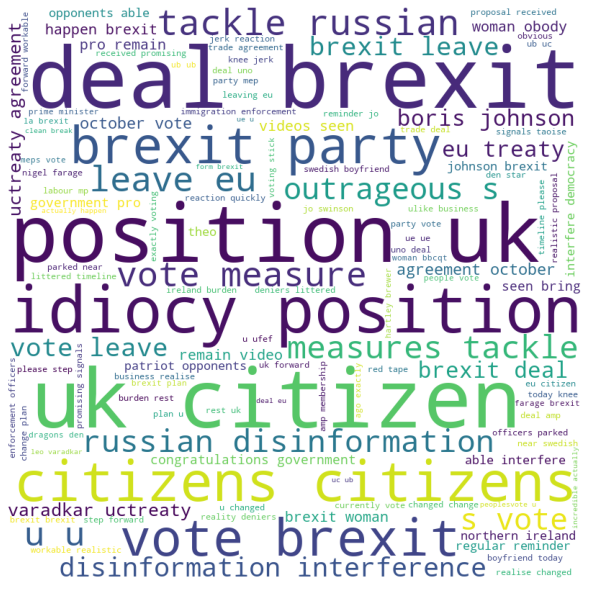

In [295]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
  
comment_words += " ".join(all_words2)+" "
    
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color = 'white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Highest Tweet Replies and Their Users

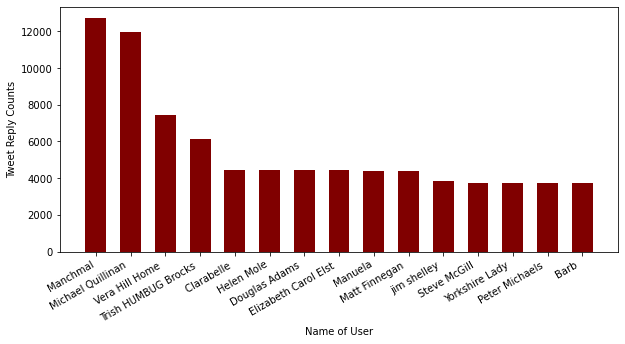

In [35]:
fig = plt.figure(figsize = (10, 5))
plt.bar(user_name, replies, color ='maroon', width = 0.6)
plt.xlabel("Name of User")
plt.ylabel("Tweet Reply Counts")
fig.autofmt_xdate()

#Sentiment Analysis

In [37]:
import re
regexlist=[]
for j in temp['Tweet_text']:
    
    tweet_string = j
#print(tweet_string)
    tweet_string = re.sub(r'@\w+',' ', tweet_string)
    tweet_string = re.sub(r'http\S+','', tweet_string)
    tweet_string = tweet_string.lower()
    tweet_string = re.sub(r'\s+',' ', tweet_string)
    tweet_string = re.sub(r'\b\\u20..',' ', tweet_string)
    tweet_string = re.sub(r'\b\\ud...',' ', tweet_string)
    tweet_string = re.sub(r'\s+',' ', tweet_string)
    tweet_string = re.sub(r"'\'",' ', tweet_string)
    tweet_string = re.sub(r'\\n',' ', tweet_string)
    tweet_string = re.sub(r'[-a-zA-Z0–9@:%._\+~=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~?&//=]*)', ' ', tweet_string, flags=re.MULTILINE)
    tweet_string = re.sub(r"\d", "", tweet_string)
    tweet_string = re.sub(r"\Art :", "", tweet_string)
    regexlist.append(tweet_string)
len(regexlist)
temp['Tweet_text']=regexlist


In [38]:
#pip install Textblob

In [39]:
from textblob import TextBlob
#create two new columns specifying polarity and subjectivity of a tweet
emptylist=[]
listp=[]
lists=[]

for k in range(len(regexlist)):
    txtdata = regexlist[k]
    polarity = TextBlob(txtdata).polarity
    subjectivity = TextBlob(txtdata).subjectivity
    listp.append(polarity)
    lists.append(subjectivity)
temp['polarity']=listp
temp['subjectivity']=lists

Number of Neutral Tweets:  21176 
Number of Positive sentiment tweets:  22388 
Number of Negative sentiment tweets:  18370


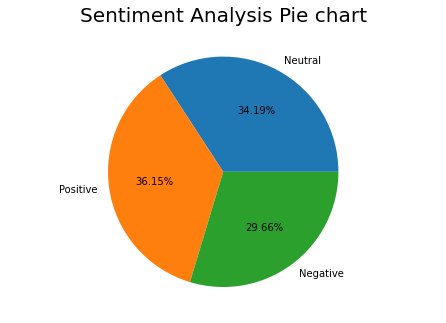

<Figure size 720x720 with 0 Axes>

Percentage of total tweets which are subjective:  47.66041269738754%


In [40]:
#. Polarity is essentially measured on a scale from -1 to +1. When polarity of a certain tweet is found to be 0, it is classified as a neutral tweet. Similarly, a polarity of more than 0 indicates towards a 
#positively toned tweet and a polarity below 0 alludes to a negatively sentimental tweet. 
neutral = temp[temp['polarity']==0].shape[0] # neutral tweets
positive = temp[temp['polarity']>0].shape[0] # positive tweets
negative = temp[temp['polarity']<0].shape[0] # negative tweets
print("Number of Neutral Tweets: ", neutral,"\nNumber of Positive sentiment tweets: ",positive,"\nNumber of Negative sentiment tweets: ",negative)

from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Sentiment Analysis Pie chart', fontsize=20)
ax.axis('equal')
types = ['Neutral ', 'Positive', 'Negative']
sentiments = [neutral,positive,negative]
ax.pie(sentiments, labels = types,autopct='%1.2f%%')
plt.figure(figsize = (10, 10))
plt.show()

#Are most tweets are subjective or fact based?
sub = temp[temp['subjectivity']>=0.5].shape[0]
per = str((sub/total_tweets1)*100)
print("Percentage of total tweets which are subjective: ", (per)+"%")

In [41]:
#Tweets Sentiment in a Radar
import plotly.express as px
temp6 = pd.DataFrame(dict(
    r=[neutral, positive, negative],
    theta=['Neutra', 'Positive', 'Negative']))
fig = px.line_polar(temp6, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()
#To further analyze the radar graph, make a circle within the given radar circle 

# Tracing Tweets to Their Original Location

In [44]:
tweet_location1 = temp['Location'].value_counts()
tweet_location1 = tweet_location1[tweet_location1 > 5]
print(tweet_location1)

Not Disclosed                  19221
London                          3791
United Kingdom                  3074
England                         1806
Scotland                         727
                               ...  
That London                        6
UK n n                             6
Horsforth England                  6
Maldon                             6
Dubai United Arab Emirates         6
Name: Location, Length: 1074, dtype: int64


In [45]:
lenn = temp['Location'].shape[0] -1
listeu = ["England", "Denmark", "Belgium","France","Netherlands","Spain","Austria","Poland","Germany","Portugal", "Bulgaria", "Croatia", "Cyprus", "Czech","Estonia", "Finland", "Hungary", "Latvia", "Lithuania", "Luxembourg", "Malta", "Slovenia",  "Sweden"] # add more countries
magnitude =[]

hdf = pd.DataFrame(np.array(listeu),columns=['Countries'])
count=0
for i in range(len(listeu)):
    for j in range(lenn):
        if (temp['Location'][j].find(listeu[i])!=-1):
            count=count+1
    magnitude.append(count)
    count=0

In [46]:
total_tweets_England = temp["Location"].to_list()
counter_eng=0
for z in range(len(total_tweets_England)):
    if total_tweets_England[z].find("England")!=-1:
        counter_eng=counter_eng+1
    elif total_tweets_England[z].find("United Kingdom")!=-1:
        counter_eng=counter_eng+1
    elif total_tweets_England[z].find("United Kingdom")!=-1:
        counter_eng=counter_eng+1
counter_eng

11543

In [47]:
latdf = pd.read_csv("LatLong.txt")
hdf['magnitude']=magnitude
hdf
hdf["yes/no"]=0
latdf["yes/no"]=0
for x in range(len(listeu)):
    for q in range(192):
        if (latdf['Country'][q].find(listeu[x])!=-1):
            latdf["yes/no"][q]=1
            break

#Show countries found
latestdf = latdf[latdf["yes/no"]==1]
latestdf["Magnitude"] = magnitude
latestdf["Magnitude"][59] = counter_eng
latestdf

<ipython-input-47-d1f528704f4d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-d1f528704f4d>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-d1f528704f4d>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ibm t460s\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning:


A value is trying to be s

Country Code  Latitude  \
8                                  Republic of Austria   AT  47.33333   
14                                  Kingdom of Belgium   BE  50.75000   
16                                Republic of Bulgaria   BG  42.66667   
41                                  Republic of Cyprus   CY  35.00000   
42                                             Czechia   CZ  49.75000   
43                         Federal Republic of Germany   DE  51.50000   
45                                  Kingdom of Denmark   DK  56.00000   
50                                 Republic of Estonia   EE  59.00000   
53                                    Kingdom of Spain   ES  40.00000   
55                                 Republic of Finland   FI  64.00000   
57                                  Republic of France   FR  46.00000   
59   United Kingdom of Great Britain and Northern I...   GB  54.75844   
71                                 Republic of Croatia   HR  45.16667   
73                                             Hungary   HU  47.00000   
102                              Republic of Lithuania   LT  55.41667   
103                          Grand Duchy of Luxembourg   LU  49.75000   
104                                 Republic of Latvia   LV  57.00000   
116                                  Republic of Malta   MT  35.91667   
127                         Kingdom of the Netherlands   NL  52.25000   
138                                 Republic of Poland   PL  52.00000   
139                                  Portugal Republic   PT  39.69450   
150                                  Kingdom of Sweden   SE  62.00000   
152                               Republic of Slovenia   SI  46.08333   

     Longitude  yes/no  Magnitude  
8     13.33333       1       7876  
14     4.50000       1         27  
16    25.25000       1        105  
41    33.00000       1        610  
42    15.00000       1        118  
43    10.50000       1        163  
45    10.00000       1         16  
50    26.00000       1         13  
53    -4.00000       1        172  
55    26.00000       1         63  
57     2.00000       1          9  
59    -2.69531       1      11543  
71    15.50000       1         37  
73    20.00000       1         11  
102   24.00000       1         23  
103    6.16667       1         31  
104   25.00000       1         15  
116   14.43333       1          4  
127    5.75000       1          0  
138   20.00000       1         20  
139   -8.13057       1         18  
150   15.00000       1          1  
152   15.00000       1         53

In [48]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


'C:\Users\ibm' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
#GEO MAPPING KIND 1
import plotly.express as px
fig = px.density_mapbox(latestdf, lat='Latitude', lon='Longitude', z='Magnitude', radius=25,center=dict(lat=50, lon=0), zoom=0,mapbox_style="stamen-terrain")
fig.show()
#To zoom and use other controls, toggle mouse pointer to the top right of this cell.

In [50]:
#GEO MAPPING KIND 2
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [51]:
data = dict(
        type = 'choropleth',
        colorscale = 'greens',
        locations = latestdf['Country'],
        locationmode = "country names",
        z = latestdf['Magnitude'],
        text = latestdf['Country'],
        colorbar = {'title' : 'Number of Tweets'},
      )
##
layout = dict(title = 'Tracing Tweets to their Locations',
              geo = dict(projection = {'type':'mercator'})
             )

In [52]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)
#To zoom and use other controls, toggle mouse pointer to the top right of this cell.
#Write Explanation of plot

In [53]:
#pip install wordcloud

In [54]:
stop = [i for i in all_words if (i == 'stop')]
leave = [i for i in all_words if (i == 'leave')]
remain = [i for i in all_words if (i == 'remain')]
economy = [i for i in all_words if (i == 'immigration')]

In [55]:
print('Total Tweets between 7 and 9:30 on 11th October, 2019:', len(temp))
temp_drop_duplicates = temp.copy()
temp_drop_duplicates.drop_duplicates(subset ="User_id",
                     keep = False, inplace = True)
print('Unique number of Users on twitter who tweeted between 7 and 9:26', len(temp_drop_duplicates))

Total Tweets between 7 and 9:30 on 11th October, 2019: 61934
Unique number of Users on twitter who tweeted between 7 and 9:26 20262


In [58]:
tempp = temp.copy()
tempp.sort_values(by='Reply_count', ascending = False, inplace=True)
tempp = tempp.drop(columns=['Tweet_date', 'Tweet_id_No', 'Tweet_text', 'Tweet_Source',
       'Truncated_Status', 'Name of User', 'Screen Name of user',
       'Location', 'URL', 'Description', 'translator_type', 'Verified',
       'Cumulative_favorites', 'Account_creation_date',
       'geo_enabled_status', 'contributors_enabled', 'is_translator',
       'Extended_tweet', 'Entities', 'Listed_count', 'Friends_count', 
       'Favorites_count', 'polarity', 'subjectivity'])
tempp.head(10)

User_id  Followers_count  Statuses_count  Reply_count  \
7257   8.471464e+17           1130.0         35132.0      12712.0   
7359   2.260620e+09              2.0            28.0      11988.0   
48299  1.176922e+18            242.0          2645.0       7455.0   
9305   1.091982e+18            257.0          2778.0       6108.0   
16312  4.763717e+09              6.0           951.0       4468.0   
50586  1.345298e+09            762.0         42172.0       4468.0   
37226  1.491198e+09            347.0          7080.0       4468.0   
40172  2.832739e+09             11.0          1275.0       4468.0   
47553  1.088706e+18             19.0           170.0       4417.0   
4354   2.702818e+09            584.0         33991.0       4417.0   

       Retweet_count  
7257          9380.0  
7359         27775.0  
48299        20808.0  
9305          6169.0  
16312         5058.0  
50586         5058.0  
37226         5058.0  
40172         5058.0  
47553        51656.0  
4354         51655.0

#Total Number of Tweets of All time from a given user

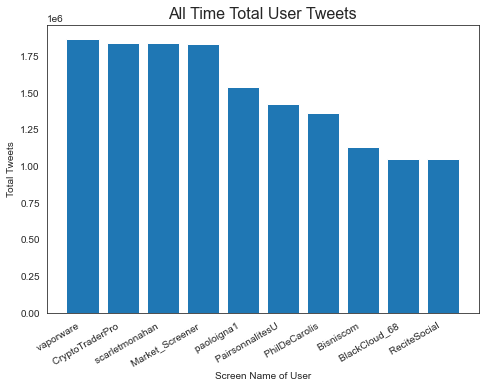

In [269]:
#Total Number of Tweets of All time from a given user
tempo = temp.copy()
tempo.sort_values(by='Statuses_count', ascending = False, inplace=True)
tempo.drop_duplicates(subset ="User_id",
                     keep = False, inplace = True)

tempo = tempo.drop(columns=['Tweet_date', 'Tweet_id_No', 'Tweet_text', 'Tweet_Source',
       'Truncated_Status', 'User_id', 'Name of User',
       'Location', 'URL', 'Description', 'translator_type',
       'Followers_count', 'Friends_count', 'Listed_count',
       'Cumulative_favorites', 'Account_creation_date', 
       'geo_enabled_status', 'contributors_enabled', 'is_translator',
       'Extended_tweet', 'Entities', 'Reply_count', 'Retweet_count',
       'Favorites_count', 'polarity', 'subjectivity', 'Verified'])
tempo = tempo.head(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = list(tempo['Screen Name of user'])
y = list(tempo['Statuses_count'])
plt.xlabel("Screen Name of User")
plt.ylabel("Total Tweets")
plt.title('All Time Total User Tweets', fontsize=16)
ax.bar(x, y)
fig.autofmt_xdate()
plt.show()

In [65]:
pip install quilt

Note: you may need to restart the kernel to use updated packages.


'C:\Users\ibm' is not recognized as an internal or external command,
operable program or batch file.


# POTENTIAL BOT ACCOUNTS

In [264]:
#For identification of Bots/Fake Accounts
newt = temp.copy()
newt = newt.sort_values(by='User_id', ascending = True)
newt = newt.drop(columns = ['Tweet_date', 'Tweet_id_No', 'Tweet_text', 'Tweet_Source',
       'Truncated_Status', 'Screen Name of user',
       'Location', 'URL', 'Description', 'translator_type', 'Verified',
        'Listed_count',
       'Cumulative_favorites', 'Account_creation_date',
       'geo_enabled_status', 'contributors_enabled', 'is_translator',
       'Extended_tweet', 'Entities', 'Reply_count', 
       'Favorites_count', 'polarity', 'subjectivity'])

In [265]:
newt = newt[newt['Followers_count'] < 10]
#newt = newt[newt['Friends_count'] < 1000]
#newt = newt[newt['Retweet_count'] > 1000]
#newt = newt[newt['Statuses_count'] < 8000]
tempti = newt
#tempti.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
tempti

User_id           Name of User  Followers_count  Friends_count  \
9940   1.943962e+07         Nick Houghton               5.0           55.0   
45539  2.036716e+07  Diane Thurman Leslie               8.0           57.0   
25165  2.248152e+07       douglas travers               9.0           13.0   
36959  2.274571e+07              jon ward               1.0           20.0   
29825  2.491124e+07         Vonnie Heffer               7.0           91.0   
...             ...                    ...              ...            ...   
26371  1.182561e+18           PedroSamosa               0.0            5.0   
39292  1.182573e+18             Ella Dodd               0.0           12.0   
50302  1.182575e+18                  Rhea               0.0            0.0   
54917  1.182582e+18       JustGladItsOver               0.0           17.0   
58486  1.182583e+18   Definitelynotsargon               0.0            0.0   

       Statuses_count  Retweet_count  
9940            247.0          963.0  
45539          1045.0         1324.0  
25165           470.0            0.0  
36959           103.0            0.0  
29825           157.0         8159.0  
...               ...            ...  
26371             1.0         2355.0  
39292             1.0         5700.0  
50302             6.0            0.0  
54917             1.0            0.0  
58486             5.0            0.0  

[1398 rows x 6 columns]

In [268]:
import plotly.graph_objects as go


N = 1000
random_x = tempti.Retweet_count.iloc[:1000]
random_y0 = tempti.Followers_count.iloc[:1000]
random_y1 = tempti.Friends_count.iloc[:1000]
#random_y2 = tempti.Statuses_count.iloc[:1000]

fig = go.Figure()


fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='markers',
                    name='Followers_count'))

fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='markers',
                    name='Friends_count'))
'''
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers',
                    name='Statuses_count'))
'''
title = "Potential Bot Accounts Detection"
fig.show()  

#REGRESSION ANALYSIS BETWEEN STATUSES COUNT AND RETWEETS DURING THE ISSUE.

In [161]:
from sklearn.linear_model import LinearRegression
x = np.array(tempp.Retweet_count.iloc[:40]).reshape((-1, 1))
y = np.array(tempp.Followers_count.iloc[:40])
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('slope:', model.coef_)

coefficient of determination: 0.035617726008222106
slope: [-0.03152843]


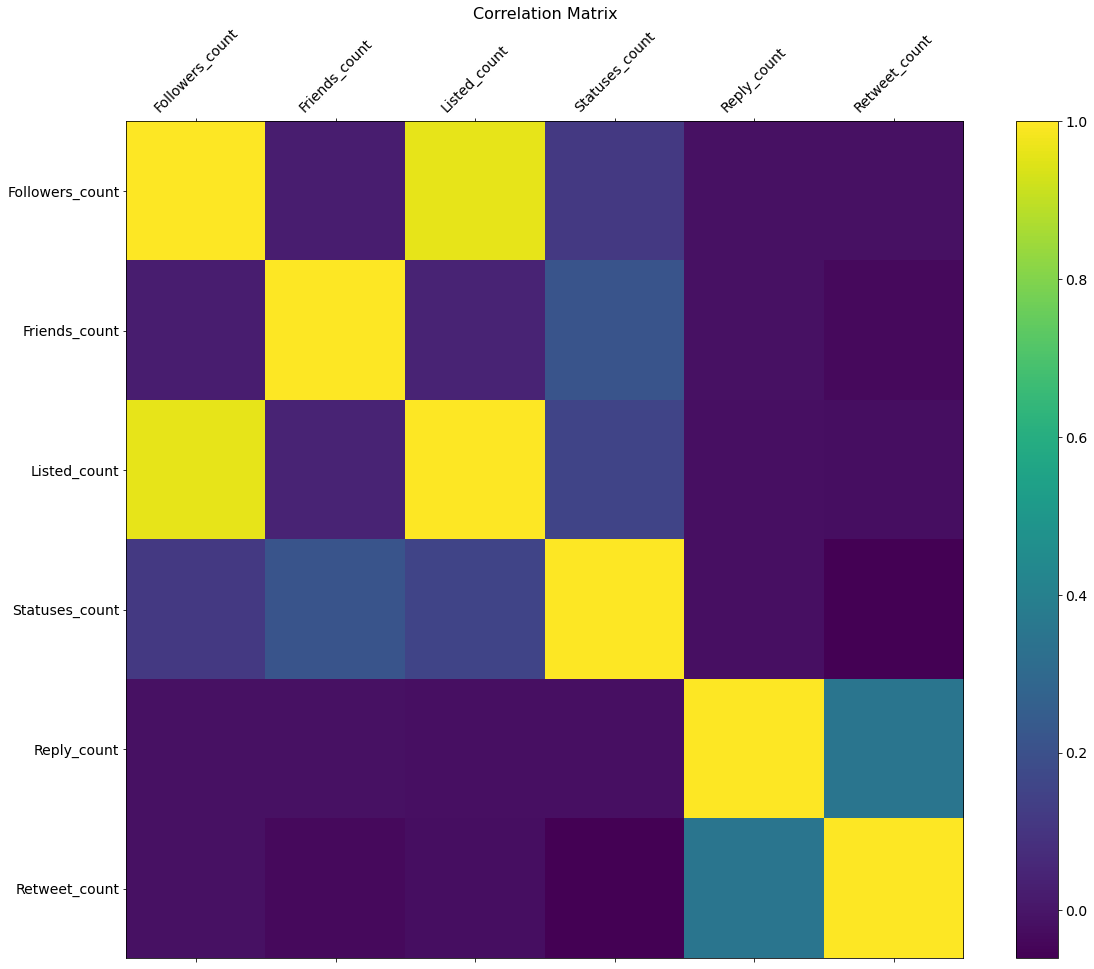

In [72]:
#Correlation Matrix Between Different Variables in the Feature Space (Columns in the Dataset):
temp_new = temp.copy()
temp_new = temp_new.drop(columns = ['Tweet_date', 'Tweet_id_No', 
       'Truncated_Status', 'User_id', 'Name of User', 'Screen Name of user',
        'translator_type', 
       'Cumulative_favorites',
       'geo_enabled_status', 'contributors_enabled', 'is_translator',
       'Entities',
       'Favorites_count', 'polarity', 'subjectivity'])

f = plt.figure(figsize=(19, 15))
plt.matshow(temp_new.corr(), fignum=f.number)
plt.xticks(range(temp_new.select_dtypes(['number']).shape[1]), temp_new.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(temp_new.select_dtypes(['number']).shape[1]), temp_new.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [73]:
corr = temp_new.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

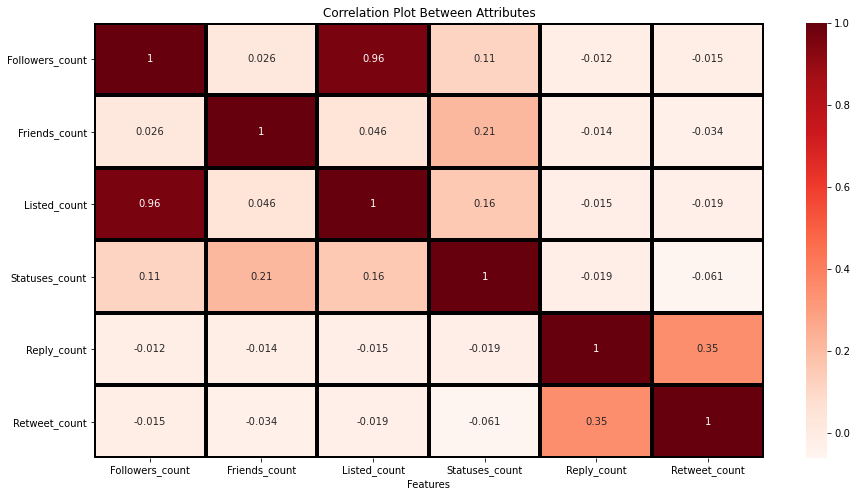

In [159]:
#pip install seaborn - install this library
import seaborn as sns
# new correlation matrix as the above one isnt perceptually understanding
corr_mat = temp_new.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr_mat, annot = True, linewidths=3, linecolor='black', cmap = 'Reds')
plt.title('Correlation Plot Between Attributes')
plt.xlabel('Features')
plt.show()

# Bigrams (List of words that were jointly mentioned in the tweets)

In [75]:
test_list = [i for i in temp_new.iloc[:5000]['Tweet_text']]
res = [(x, i.split()[j + 1]) for i in test_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
print ("The formed bigrams are : " + str(res))

The formed bigrams are : [('lady:', 'i'), ('i', 'knew'), ('knew', 'exactly'), ('exactly', 'what'), ('what', 'i'), ('i', 'voted'), ('voted', 'for'), ('for', '...'), ('...', 'lady:'), ('lady:', 'none'), ('none', 'of'), ('of', 'knows'), ('knows', 'what'), ('what', 's'), ('s', 'going'), ('going', 'to'), ('to', 'happ'), ('happ', 'display_text_range:['), ('display_text_range:[', ']'), ('rt', 'ukgovscotland:'), ('ukgovscotland:', 'rt'), ('rt', 'tradegovuk:'), ('tradegovuk:', 'here'), ('here', 's'), ('s', 'your'), ('your', 'step-by-step'), ('step-by-step', 'guide'), ('guide', 'on'), ('on', 'how'), ('how', 'to'), ('to', 'transport'), ('transport', 'goods'), ('goods', 'out'), ('out', 'of'), ('of', 'the'), ('the', 'uk'), ('uk', 'and'), ('and', 'through'), ('remainer', 'fanatics'), ('fanatics', 'tried'), ('tried', 'very'), ('very', 'hard'), ('hard', 'to'), ('to', 'have'), ('have', 'julia'), ('julia', 'hartley-brewer'), ('hartley-brewer', 'dumped'), ('dumped', 'from'), ('from', 'tonight'), ('tonigh